In [2]:
from simulation import *
from aesthetics import *

In [3]:
%matplotlib inline

# Diffusion theory

In general, this relationship is generally valid:
$$
\langle x^2 \rangle = dDt
$$
where $x$ is the position, $d$ is the dimensionality factor, $D$ is the diffusion coefficient, and $t$ is time over which the mean squared displacment is averaged. In our case, we have an angle $\theta$ instead of a position and the angle is periodic, so we must unroll it. The angle moves only in one dimension, so $d = 2$ and I'm going to write the time interval explicitly as $t + \tau$. So we define the MSD as:
$$
\text{MSD} \equiv \langle \left( \theta(t + \tau) - \theta(t) \right)^{2} \rangle = 2D \tau.
$$

# Part 1: unroll the angle measurements

We keep track of two things: first, the distance (in angular space) between adjacent measurements and second, the number of times we perform a full cycle in either direction (flips and flops).

In [4]:
data = np.genfromtxt('butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')
distances = np.diff(data[:, 1])

In [11]:
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
print(len(flips))
print(len(flops))

9012
9014


Here there were 9012 rotations from negative to positive (CCW, I believe) and 9014 rotations from positive to negative (CW). We expect these to be equal because the torsion is undergo *free* diffusion with no biasing potential. Previously, we've verified that the probability of being in any bin (at any angle) is equal.

This is what the negative to positive flip looks like before unrolling th data.

In [22]:
print(data[flips[0] - 1, 1])
print(data[flips[0], 1])
print(data[flips[0] + 1, 1])
print(data[flips[0] + 2, 1])

-164.9227
-170.8365
179.0855
174.9248


After the angle has rotated through a full cycle (e.g., passing from $-180^\circ$ to $+180^\circ$) we add (or subtract) $360^\circ$ from the following measurements. 

In [19]:
unwrapped_data = np.copy(data)
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360

In [25]:
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360

Here is the same data as above, but unrolled. Notice the discontinuity (change of sign) is no longer there.
Also note that the -164 has changed to +195 (a difference of 360).

In [26]:
print(unwrapped_data[flips[0] - 1, 1])
print(unwrapped_data[flips[0], 1])
print(unwrapped_data[flips[0] + 1, 1])
print(unwrapped_data[flips[0] + 2, 1])

195.0773
189.1635
179.0855
174.9248


Now let's compare the *raw* data and the unrolled data. It's impossible to look at the raw data because the angle is fluctuating so wildly, so I'm only plotting every 10,000 data point!

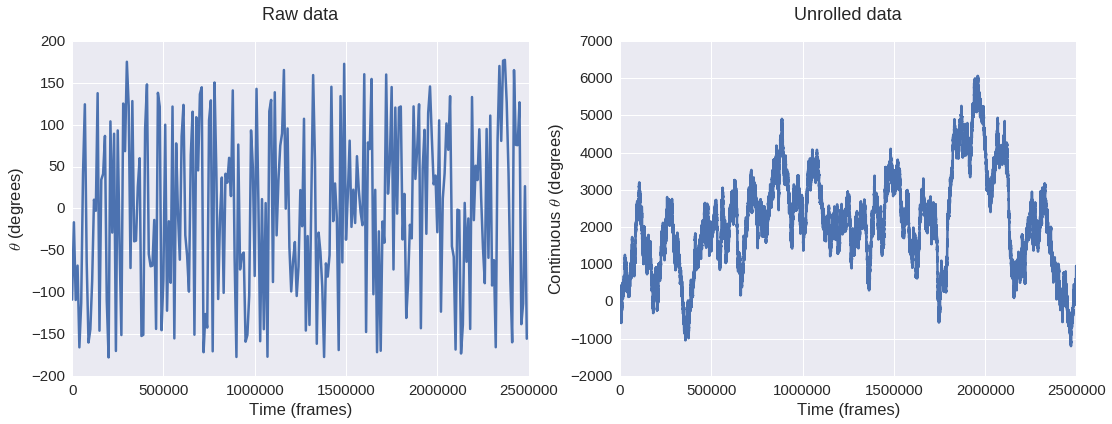

In [200]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.plot(range(1, len(data[:, 1]), 10000), data[::10000, 1])
ax1.set_title('Raw data', y=1.05)
ax1.set_ylabel(r'$\theta$ (degrees)')
ax1.set_xlabel('Time (frames)')

ax2.plot(range(len(unwrapped_data)), unwrapped_data[:, 1])
ax2.set_title('Unrolled data', y=1.05)
ax2.set_ylabel(r'Continuous $\theta$ (degrees)')
ax2.set_xlabel('Time (frames)')



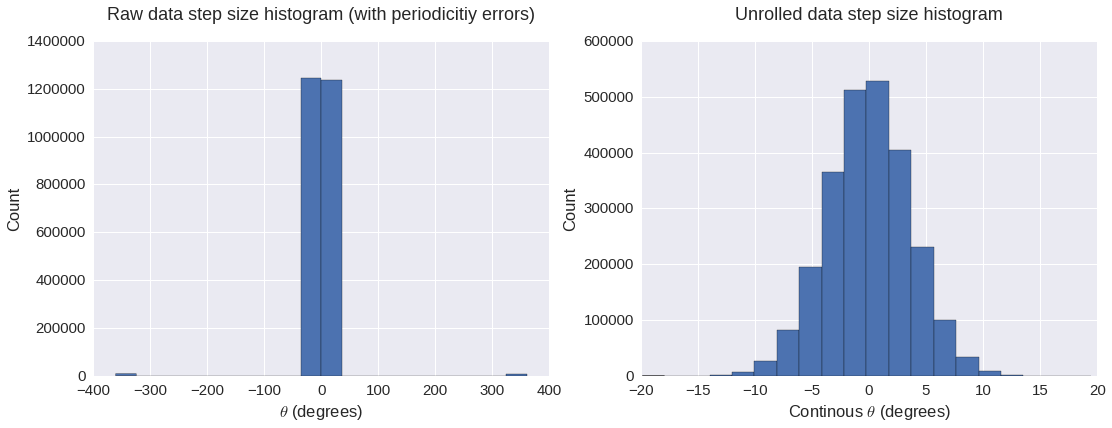

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.hist(np.diff(data[:, 1]), bins=20)
ax1.set_title('Raw data step size histogram (with periodicitiy errors)', y=1.05)
ax1.set_ylabel('Count')
ax1.set_xlabel(r'$\theta$ (degrees)')

ax2.hist(np.diff(unwrapped_data[:, 1]), bins=20)
ax2.set_title('Unrolled data step size histogram', y=1.05)
ax2.set_ylabel('Count')
ax2.set_xlabel(r'Continous $\theta$ (degrees)')


# Part 2: calculate the mean squared displacement for each time interval $\tau$ using the unrolled data

In [70]:
unwrapped_positions = unwrapped_data[:, 1]

In [143]:
def compute_msd(trajectory, delta):
    ''' For a given time interval, compute the displacements of the angle. For small time deltas,
    there are many displacements in the trajectory. As the delta gets bigger, there are fewer
    and fewer displacements.'''
    number_measurements = len(trajectory) - delta
    print('Computing mean of {} measurements'.format(number_measurements))
    displacements = np.empty((number_measurements))
    for time in range(number_measurements):
        displacements[time] = trajectory[time + delta] - trajectory[time]
    return np.mean(displacements**2), stats.sem(displacements**2)

In [145]:
delays = np.arange(10000, len(unwrapped_positions) - 1, 10000)
MSDs = np.empty((len(delays)))
SEMs = np.empty((len(delays)))
for delay in delays:
    MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)

Computing mean of 2490000 measurements
Computing mean of 2480000 measurements
Computing mean of 2470000 measurements
Computing mean of 2460000 measurements
Computing mean of 2450000 measurements
Computing mean of 2440000 measurements
Computing mean of 2430000 measurements
Computing mean of 2420000 measurements
Computing mean of 2410000 measurements
Computing mean of 2400000 measurements
Computing mean of 2390000 measurements
Computing mean of 2380000 measurements
Computing mean of 2370000 measurements
Computing mean of 2360000 measurements
Computing mean of 2350000 measurements
Computing mean of 2340000 measurements
Computing mean of 2330000 measurements
Computing mean of 2320000 measurements
Computing mean of 2310000 measurements
Computing mean of 2300000 measurements
Computing mean of 2290000 measurements
Computing mean of 2280000 measurements
Computing mean of 2270000 measurements
Computing mean of 2260000 measurements
Computing mean of 2250000 measurements
Computing mean of 2240000

In [233]:
SEMs

array([   313.33270787,    626.77636164,    921.47403316,   1205.95592117,
         1475.13193061,   1622.12553925,   1815.82091566,   2044.59314626,
         2151.92553252,   2141.57494698,   2105.90920892,   2120.85329028,
         1986.6162276 ,   2046.80144594,   2267.51024255,   2464.11213428,
         2680.04671006,   2943.8095993 ,   3202.09353988,   3343.12163567,
         3389.69563991,   3320.51575951,   3197.0808598 ,   3053.92963747,
         2931.14667768,   2824.81990281,   2770.38234447,   2711.92482808,
         2697.61930685,   2796.43242596,   2943.93048648,   3124.90772821,
         3157.79834397,   3273.54906876,   3348.9339647 ,   3320.70582066,
         3186.72270455,   3098.9042651 ,   3106.03146842,   3117.7134677 ,
         3168.90350791,   3230.86187911,   3314.77264484,   3356.39196236,
         3572.34970143,   3806.83754299,   4114.07708521,   4343.94182879,
         4451.8625896 ,   4635.92763492,   4727.87257177,   4684.94783451,
         4525.44443208,  

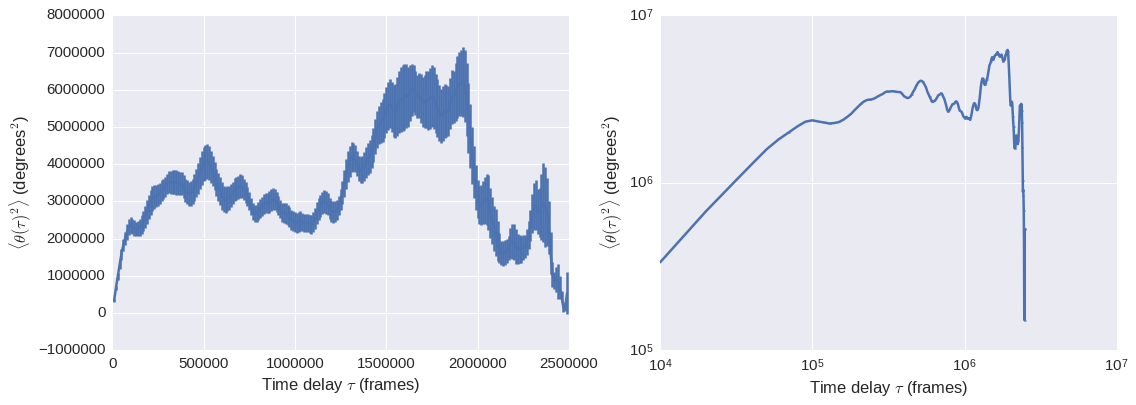

In [235]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays, MSDs, yerr=100*SEMs)
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (frames)')

ax2.errorbar(delays, MSDs, yerr=SEMs)
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (frames)')
ax2.set_xscale('log')
ax2.set_yscale('log')


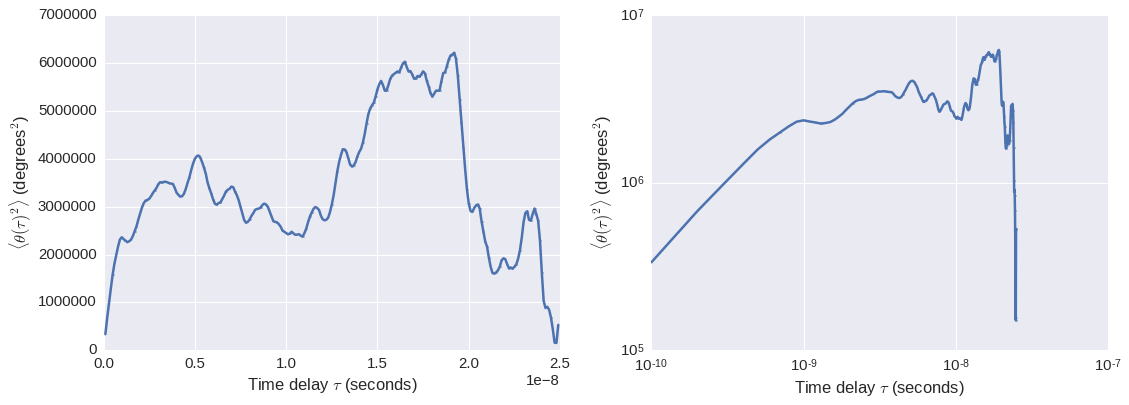

In [210]:
# Femtosecond is 10**-15
# Each frame is 10 fs = 10**-14
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (seconds)')

ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (seconds)')
ax2.set_xscale('log')
ax2.set_yscale('log')


When plotting $\langle \theta(\tau)^2 \rangle$, the slope of the plots (on the left) should be $2D$ yet cleary they are not linear. It's typical to take the middle 80% of the data to calculate the slope, because the statistics are nosiy when the time dela is a very large part or very small part of the trajectory.

In [218]:
ten_percent = 0.1*len(delays)
ninety_percent = 0.9*len(delays)
slope, intercept, r_value, p_value, std_err = stats.linregress(delays[ten_percent:ninety_percent]*10**-14,
                                                               MSDs[ten_percent:ninety_percent])


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


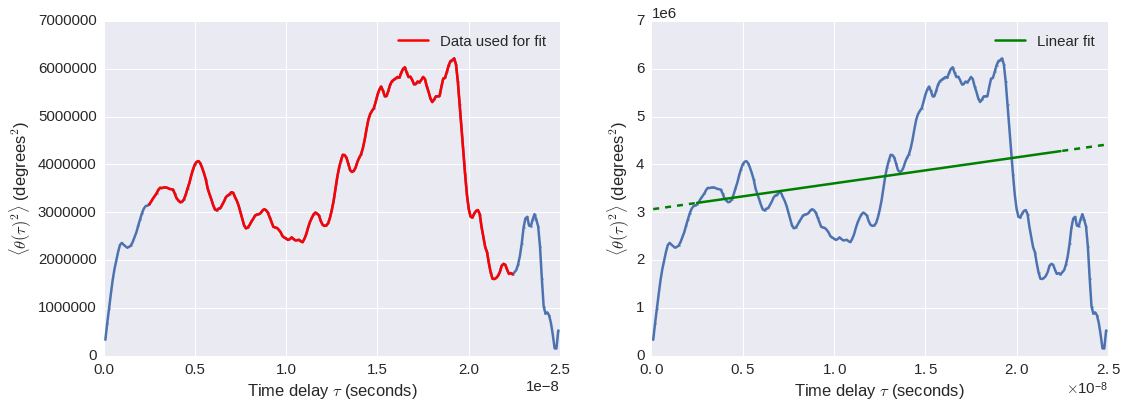

In [232]:
# Femtosecond is 10**-15
# Each frame is 10 fs = 10**-14
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax1.plot(delays[ten_percent:ninety_percent]*10**-14, MSDs[ten_percent:ninety_percent], c='r', label='Data used for fit')
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (seconds)')
ax1.legend()

ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax2.plot(delays[ten_percent:ninety_percent]*10**-14, slope*delays[ten_percent:ninety_percent]*10**-14+intercept, c='g', ls='-', label='Linear fit')
ax2.plot(delays[0:ten_percent]*10**-14, slope*delays[0:ten_percent]*10**-14+intercept, c='g', ls='--')
ax2.plot(delays[ninety_percent:]*10**-14, slope*delays[ninety_percent:]*10**-14+intercept, c='g', ls='--')
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (seconds)')
ax2.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2.xaxis.major.formatter._useMathText = True
ax2.legend()


In [224]:
print(slope)
print(slope/2)

5.43714859892e+13
2.71857429946e+13


We have $5.4 \times 10^{13}$ (degrees$^2$/second) = $2D$, so D = $2.7 \times 10^{13}$ (degrees$^2$/second). This is not that much smaller than `C_intrasurface`!

From the other notebook, we determined the probability to go left (or right) into another bin (6 degrees) in 10 fs is 0.2143 (0.5446 to stay in the same bin). Thus, we wrote:
$$
\Delta P_i = -2C \Delta t
(1 - 0.5446) = -2C(1 \times 10^{-14} \text{second})
C = 2.28 \times 10^{13} \text{second}^{-1}
$$

I believe that value represents the bin to bin transition rate for *6 degree bins* and thus, I would modify the above to like thus:
$$
\begin{align}
C &= 2.28 \times 10^{13}  \cdot \text{second}^{-1} \times \text{6 degrees} \quad \text{and, so} \\
C_\text{intrasurface} &= 3.8 \times 10^{12} \text{degrees} \cdot \text{second}^{-1}
\end{align}
$$

Thus, $D =  2.7 \times 10^{13}$ (degrees$^2$/second) and $C_\text{intrasurface} = 3.8 \times 10^{12} \text{degrees} \cdot \text{second}^{-1}$. Not sure about units.

# A new set of data!

In [236]:
data = np.genfromtxt('../butane-rotational-diffusion/Langevin-dynamics-10fs-recording/cccc.dat')
distances = np.diff(data[:, 1])

In [238]:
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
print(len(flips))
print(len(flops))
unwrapped_data = np.copy(data)

16414
16437


In [239]:
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360

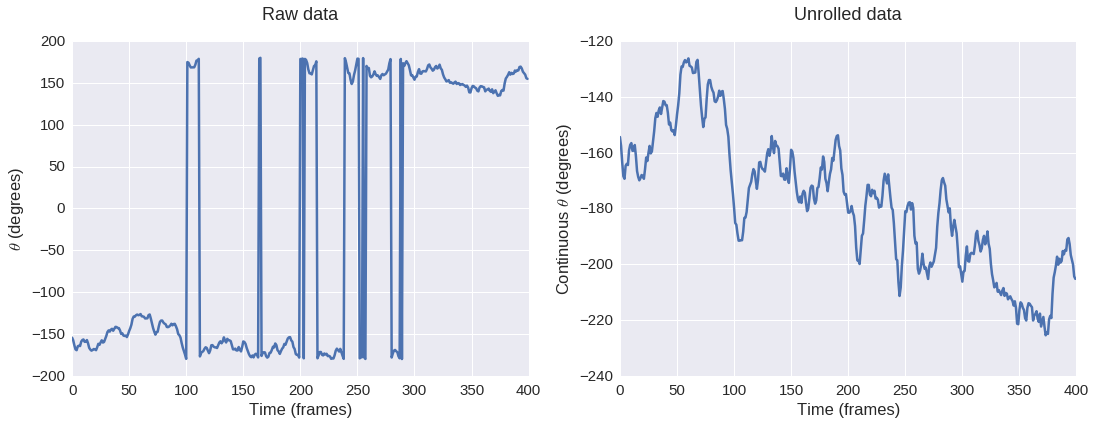

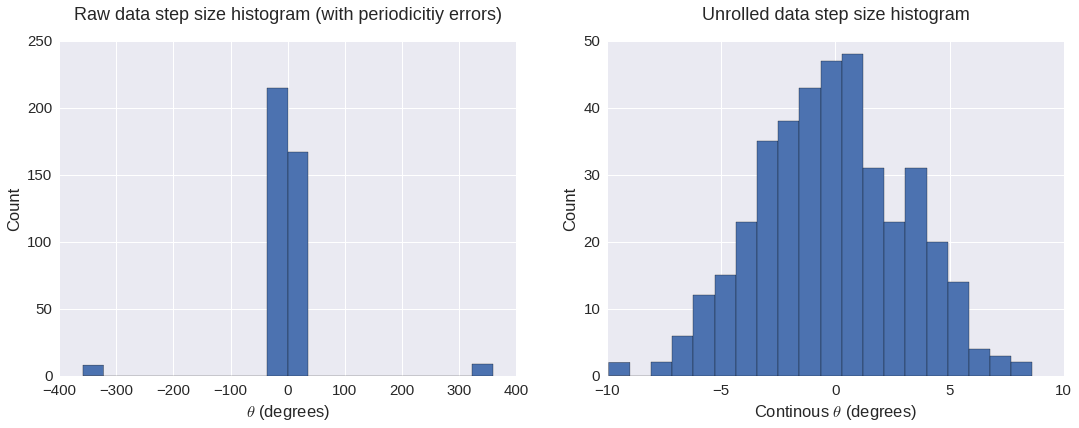

In [256]:
rng = 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.plot(range(len(data[600:rng, 1])), data[600:rng, 1])
ax1.set_title('Raw data', y=1.05)
ax1.set_ylabel(r'$\theta$ (degrees)')
ax1.set_xlabel('Time (frames)')

ax2.plot(range(len(unwrapped_data[600:rng])), unwrapped_data[600:rng, 1])
ax2.set_title('Unrolled data', y=1.05)
ax2.set_ylabel(r'Continuous $\theta$ (degrees)')
ax2.set_xlabel('Time (frames)')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.hist(np.diff(data[600:rng, 1]), bins=20)
ax1.set_title('Raw data step size histogram (with periodicitiy errors)', y=1.05)
ax1.set_ylabel('Count')
ax1.set_xlabel(r'$\theta$ (degrees)')

ax2.hist(np.diff(unwrapped_data[600:rng, 1]), bins=20)
ax2.set_title('Unrolled data step size histogram', y=1.05)
ax2.set_ylabel('Count')
ax2.set_xlabel(r'Continous $\theta$ (degrees)')


In [346]:
unwrapped_positions[-1]

-2668.2882000000682

In [242]:
unwrapped_positions = unwrapped_data[:, 1]

In [243]:
delays = np.arange(10000, len(unwrapped_positions) - 1, 10000)
MSDs = np.empty((len(delays)))
SEMs = np.empty((len(delays)))
for delay in delays:
    MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)

Computing mean of 4990000 measurements
Computing mean of 4980000 measurements
Computing mean of 4970000 measurements
Computing mean of 4960000 measurements
Computing mean of 4950000 measurements
Computing mean of 4940000 measurements
Computing mean of 4930000 measurements
Computing mean of 4920000 measurements
Computing mean of 4910000 measurements
Computing mean of 4900000 measurements
Computing mean of 4890000 measurements
Computing mean of 4880000 measurements
Computing mean of 4870000 measurements
Computing mean of 4860000 measurements
Computing mean of 4850000 measurements
Computing mean of 4840000 measurements
Computing mean of 4830000 measurements
Computing mean of 4820000 measurements
Computing mean of 4810000 measurements
Computing mean of 4800000 measurements
Computing mean of 4790000 measurements
Computing mean of 4780000 measurements
Computing mean of 4770000 measurements
Computing mean of 4760000 measurements
Computing mean of 4750000 measurements
Computing mean of 4740000

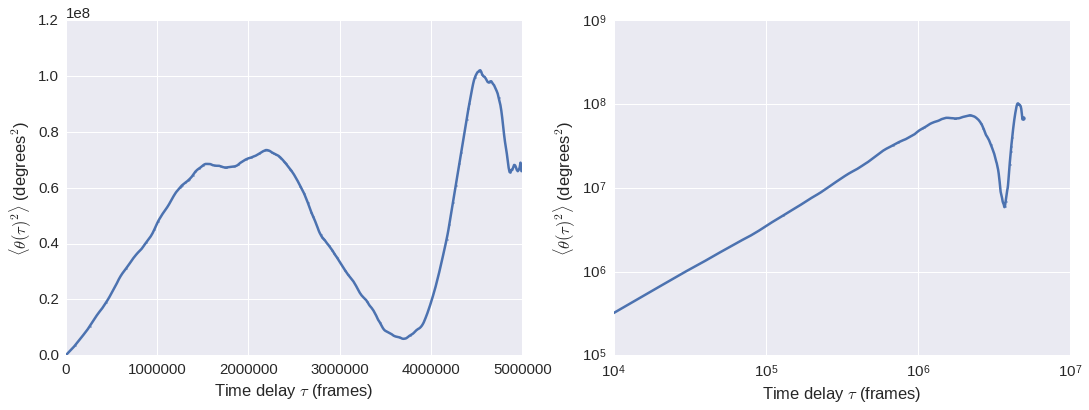

In [245]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays, MSDs, yerr=SEMs)
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (frames)')

ax2.errorbar(delays, MSDs, yerr=SEMs)
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (frames)')
ax2.set_xscale('log')
ax2.set_yscale('log')

In [246]:
ten_percent = 0.1*len(delays)
ninety_percent = 0.9*len(delays)
slope, intercept, r_value, p_value, std_err = stats.linregress(delays[ten_percent:ninety_percent]*10**-14,
                                                               MSDs[ten_percent:ninety_percent])

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [247]:
print(slope)
print(slope/2)

-5.61100568547e+14
-2.80550284274e+14


/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


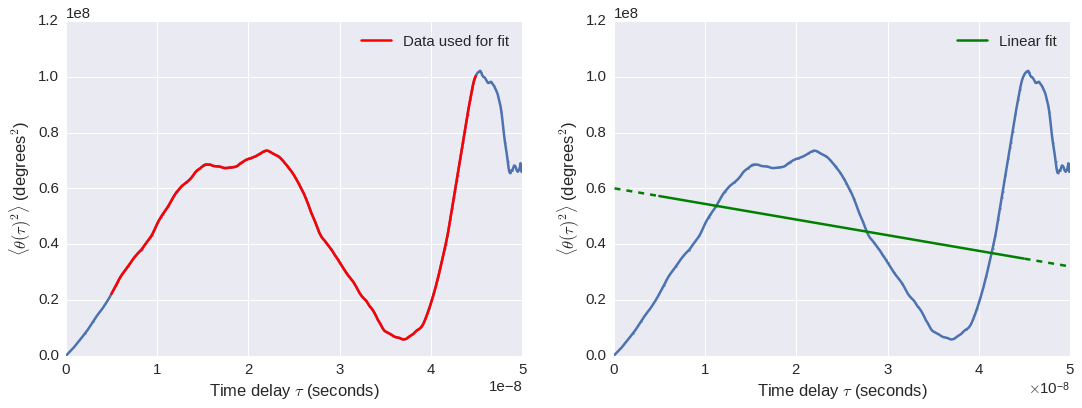

In [248]:
# Femtosecond is 10**-15
# Each frame is 10 fs = 10**-14
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.2)
ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax1.plot(delays[ten_percent:ninety_percent]*10**-14, MSDs[ten_percent:ninety_percent], c='r', label='Data used for fit')
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (seconds)')
ax1.legend()

ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)
ax2.plot(delays[ten_percent:ninety_percent]*10**-14, slope*delays[ten_percent:ninety_percent]*10**-14+intercept, c='g', ls='-', label='Linear fit')
ax2.plot(delays[0:ten_percent]*10**-14, slope*delays[0:ten_percent]*10**-14+intercept, c='g', ls='--')
ax2.plot(delays[ninety_percent:]*10**-14, slope*delays[ninety_percent:]*10**-14+intercept, c='g', ls='--')
ax2.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax2.set_xlabel(r'Time delay $\tau$ (seconds)')
ax2.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
ax2.xaxis.major.formatter._useMathText = True
ax2.legend()

# Read in 100 separate 5 ns trajectories and calculate the mean (over all those files) of the displacement in 5 ns.

In [315]:
runs = range(1, 100)
prefix = '/home/dslochower/2016-Research/Nonequilibrium/'

In [356]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# fig, (ax2) = plt.subplots(1, 1, figsize=(18, 6))
end_points = np.empty((len(runs)))
end_positions = 250000
squared_displacement = np.empty((len(runs)))
for run in runs:
    print(run)
    os.chdir(prefix + '/butane-rotational-diffusion/Langevin-dynamics-10fs-recording/'+str(run))
    datum = np.genfromtxt('cccc.dat')
    distances = np.diff(datum[:, 1])
    flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
    flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
    unwrapped_datum = np.copy(datum)
    for subtraction in flips: 
        unwrapped_datum[subtraction + 1:, 1] -= 360
    for addition in flops: 
        unwrapped_datum[addition + 1:, 1] += 360
    unwrapped_positions = unwrapped_datum[:, 1]
    # ax1.plot(unwrapped_positions, alpha=0.5)
    # ax2.plot(autocorr(unwrapped_positions), alpha=0.5)
    # degrees**2 per 5 ns
    squared_displacement[run - 1] = (unwrapped_positions[end_positions] - unwrapped_positions[0])**2 / ((end_positions / 500000)*5 * 10**-9)
    end_points[run - 1] = unwrapped_positions[-1]
    os.chdir(prefix + '/butane-rotational-diffusion/Langevin-dynamics-10fs-recording/')
    # gc.collect()
# ax1.set_ylabel(r'$\theta$ (degrees)')
# ax1.set_xlabel(r'Time (frames)')
# ax2.set_xlabel(r'Time (frames)')
# ax2.set_ylabel('Autocorrelation')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [357]:
squared_displacement

array([  8.03686439e+14,   3.31647004e+14,   7.43750421e+14,
         2.41959078e+15,   6.13073090e+15,   1.28223740e+16,
         9.55746339e+15,   8.17566826e+15,   9.63665490e+14,
         3.26915184e+14,   1.32087072e+14,   2.88193132e+14,
         1.54978179e+15,   1.32452760e+13,   7.17859919e+14,
         7.37752362e+15,   2.91477427e+14,   3.31666085e+15,
         3.18331540e+14,   1.79546000e+16,   2.92815833e+15,
         5.02460199e+14,   1.38006707e+15,   3.72184307e+15,
         2.46854940e+14,   1.56577968e+15,   2.52096236e+15,
         7.88399795e+13,   6.09674313e+15,   3.76551696e+12,
         1.95295814e+15,   1.87607645e+14,   5.41067236e+14,
         1.57657374e+15,   3.80602576e+15,   6.29467057e+13,
         4.29907630e+14,   4.39352756e+15,   3.61742223e+15,
         1.53550858e+15,   1.29085280e+13,   8.81017904e+15,
         2.82466930e+15,   9.21846544e+13,   3.13622244e+15,
         1.63225260e+15,   8.85747135e+13,   6.70360348e+14,
         1.14371313e+15,

In [358]:
MSD = np.mean(squared_displacement)

In [359]:
SEM = stats.sem(squared_displacement)

In [360]:
print('{0:2.2e} +/- {1:2.2e}'.format(MSD, SEM))

3.28e+15 +/- 4.79e+14


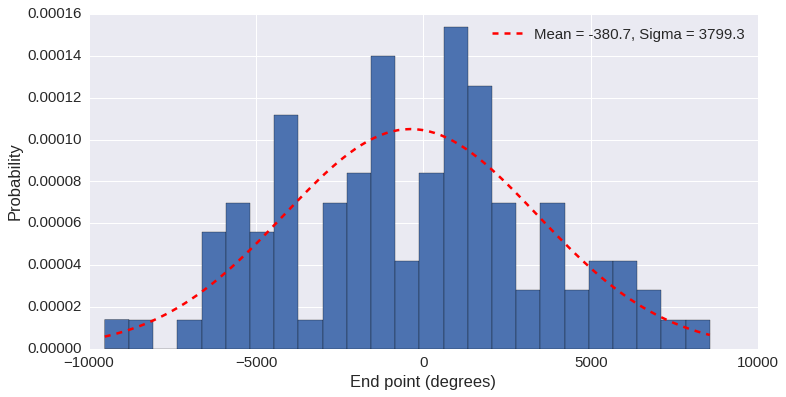

In [345]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
ax1.hist(end_points, bins=25, normed=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('End point (degrees)')

mean = np.mean(end_points)
variance = np.var(end_points)
sigma = np.sqrt(variance)

x = np.linspace(min(end_points), max(end_points),100)
import matplotlib.mlab as mlab
ax1.plot(x,mlab.normpdf(x,mean,sigma), c='r', ls='--', label='Mean = {0:1.1f}, Sigma = {1:1.1f}'.format(mean, sigma))
ax1.legend()

In [326]:
np.sqrt(2*pi/500000)

0.003544907701811032

In [331]:
np.mean(end_points)

-380.69872424242351

In [350]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [351]:
autocorr(unwrapped_positions)

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


array([  8.54904207e+12,   8.54903519e+12,   8.54902651e+12, ...,
         7.82224096e+05,   5.10044601e+05,   2.55418152e+05])